<a href="https://colab.research.google.com/github/Shkum/IT_STEP/blob/ML/module2/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['formatted date', 'summary', 'precip type', 'temperature (c)',
       'apparent temperature (c)', 'humidity', 'wind speed (km/h)',
       'wind bearing (degrees)', 'visibility (km)', 'loud cover',
       'pressure (millibars)', 'daily summary'],
      dtype='object')

# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [7]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   formatted date            96453 non-null  object 
 1   summary                   96453 non-null  object 
 2   precip type               95936 non-null  object 
 3   temperature (c)           96453 non-null  float64
 4   apparent temperature (c)  96453 non-null  float64
 5   humidity                  96453 non-null  float64
 6   wind speed (km/h)         96453 non-null  float64
 7   wind bearing (degrees)    96453 non-null  float64
 8   visibility (km)           96453 non-null  float64
 9   loud cover                96453 non-null  float64
 10  pressure (millibars)      96453 non-null  float64
 11  daily summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [8]:
print(df['loud cover'].info())
print()
print(df['loud cover'].unique())

# DELETE COLUMN

df.drop(columns=['loud cover'], inplace=True)

df.head()

<class 'pandas.core.series.Series'>
RangeIndex: 96453 entries, 0 to 96452
Series name: loud cover
Non-Null Count  Dtype  
--------------  -----  
96453 non-null  float64
dtypes: float64(1)
memory usage: 753.7 KB
None

[0.]


,formatted date,summary,precip type,temperature (c),apparent temperature (c),humidity,wind speed (km/h),wind bearing (degrees),visibility (km),pressure (millibars),daily summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


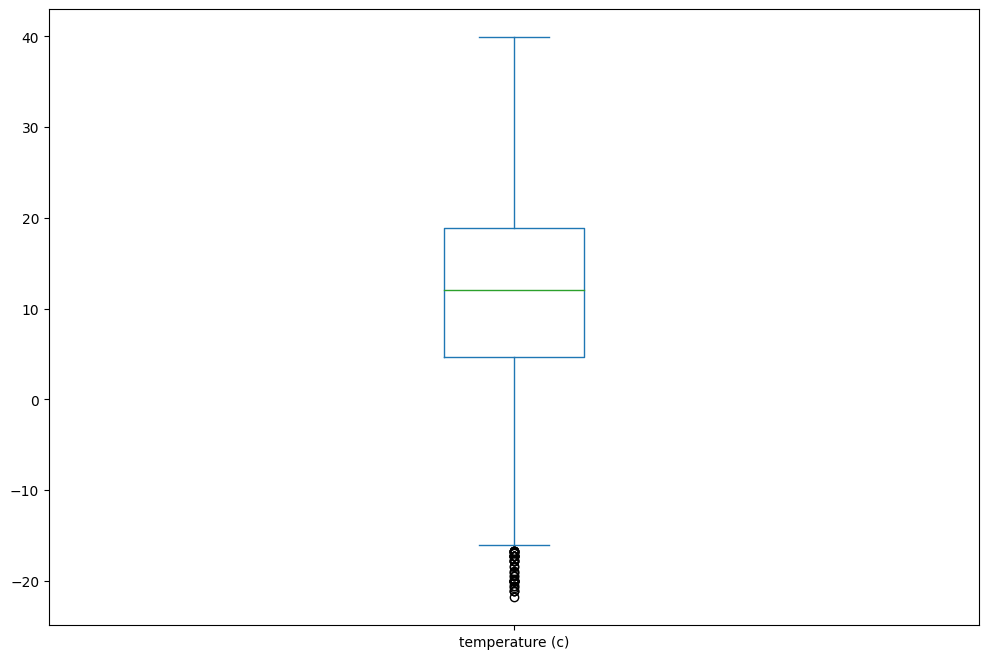

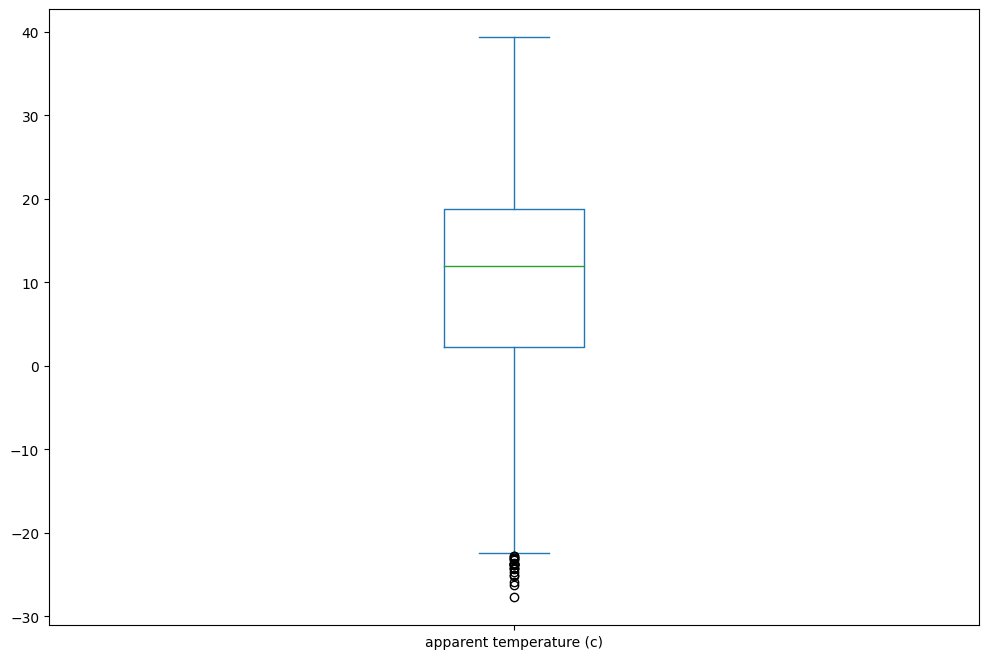

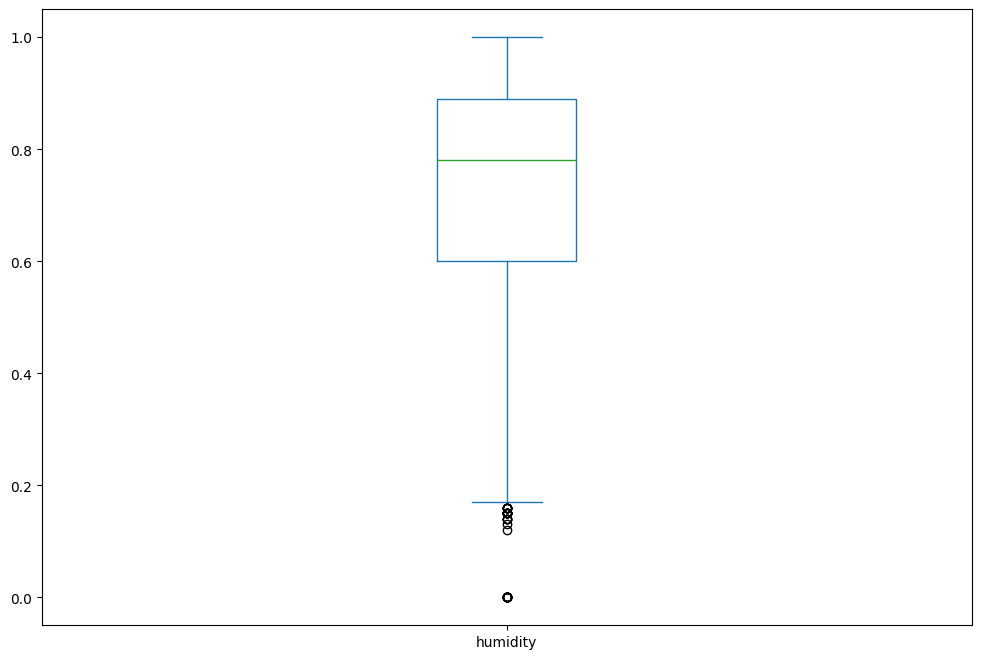

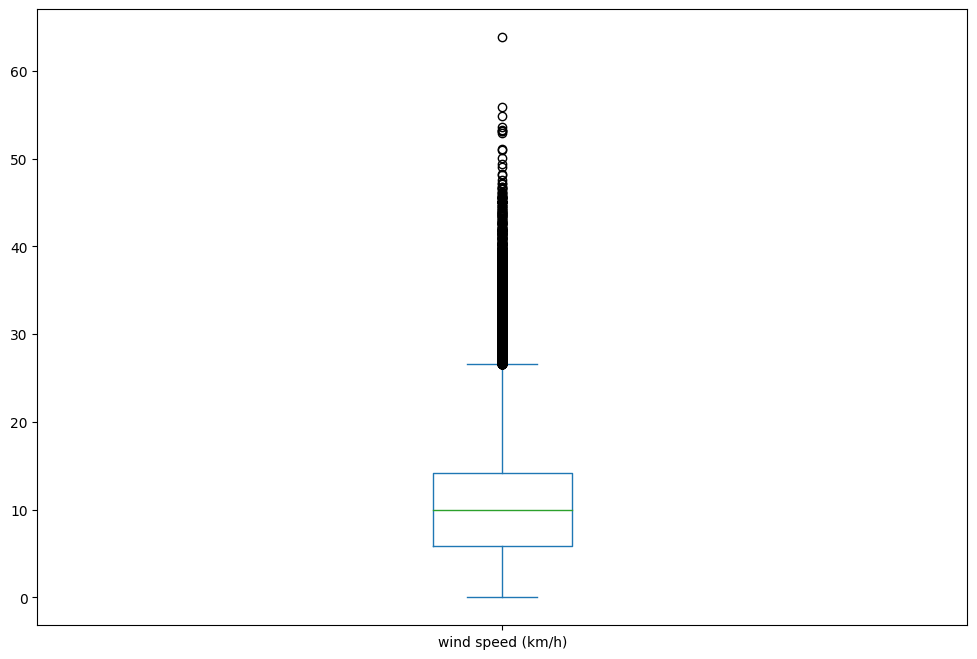

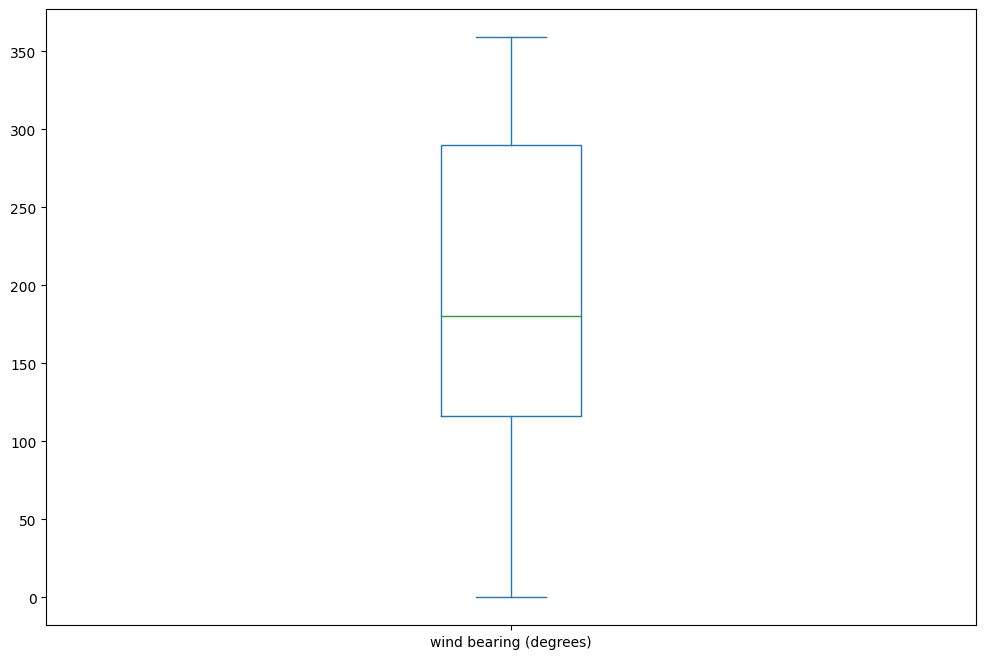

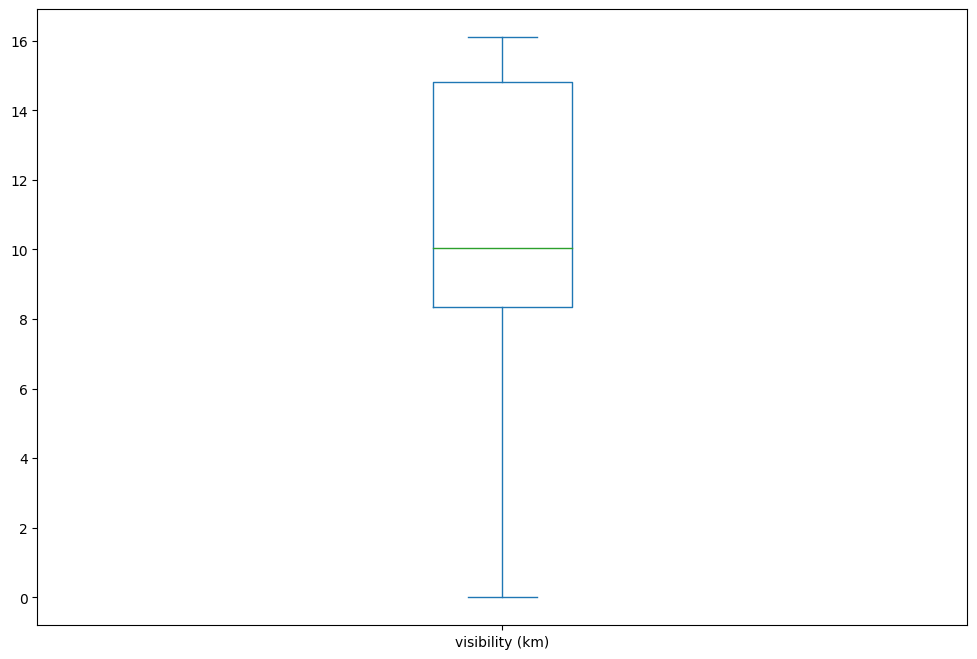

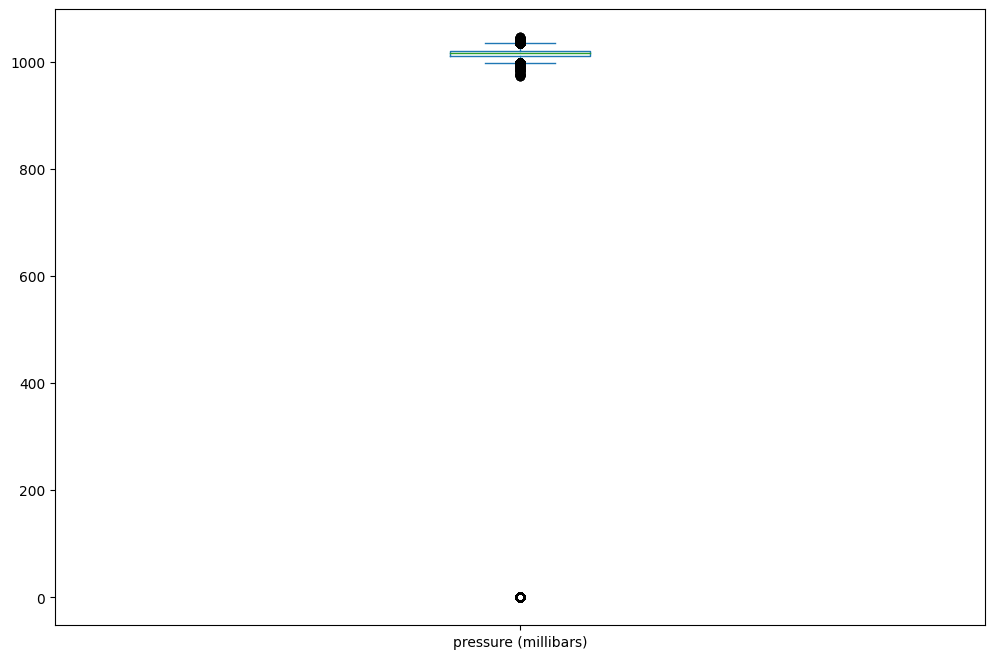

In [9]:
for column in df.columns:
    if df[column].dtype in (int, float):
        df[[column]].plot(kind='box', figsize=(12, 8))

In [10]:
for column in df.columns:
    if df[column].dtype not in (int, float):
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Histogram for {column}')
        plt.show()

KeyboardInterrupt: 

# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

In [17]:
q1 = df.quantile(q=0.25)
q3 = df.quantile(q=0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
mask = ((df <= lower) | (df >= upper)).any()
df.loc[:, mask]

<ipython-input-17-3df125febe8b>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(q=0.25)
<ipython-input-17-3df125febe8b>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(q=0.75)
<ipython-input-17-3df125febe8b>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ((df <= lower) | (df >= upper)).any()


,temperature (c),apparent temperature (c),humidity,wind speed (km/h),pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,1015.13
1,9.355556,7.227778,0.86,14.2646,1015.63
2,9.377778,9.377778,0.89,3.9284,1015.94
3,8.288889,5.944444,0.83,14.1036,1016.41
4,8.755556,6.977778,0.83,11.0446,1016.51
...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,1014.36
96449,24.583333,24.583333,0.48,10.0947,1015.16
96450,22.038889,22.038889,0.56,8.9838,1015.66
96451,21.522222,21.522222,0.60,10.5294,1015.95


# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

<ipython-input-12-038bc8655bff>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')


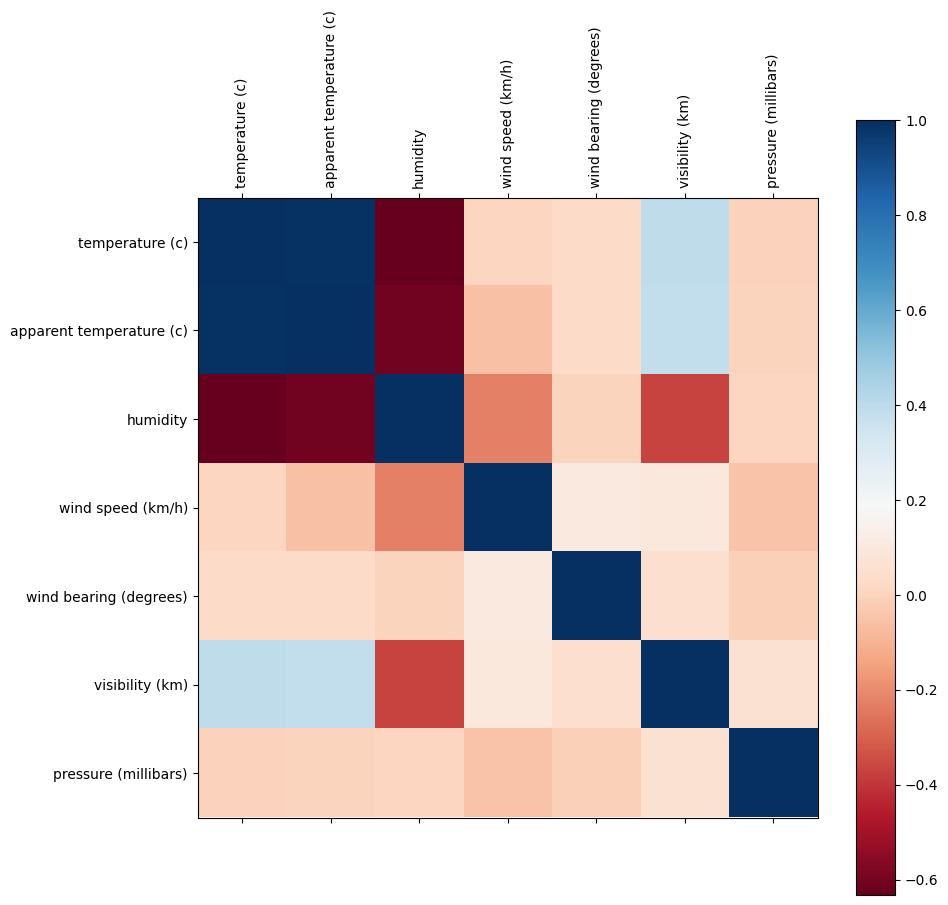

In [12]:
corr = df.corr(method='pearson')
fig = plt.figure(figsize=(10,10))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()

In [18]:
df.columns

Index(['formatted date', 'summary', 'precip type', 'temperature (c)',
       'apparent temperature (c)', 'humidity', 'wind speed (km/h)',
       'wind bearing (degrees)', 'visibility (km)', 'pressure (millibars)',
       'daily summary'],
      dtype='object')

<Axes: xlabel='temperature (c)', ylabel='apparent temperature (c)'>

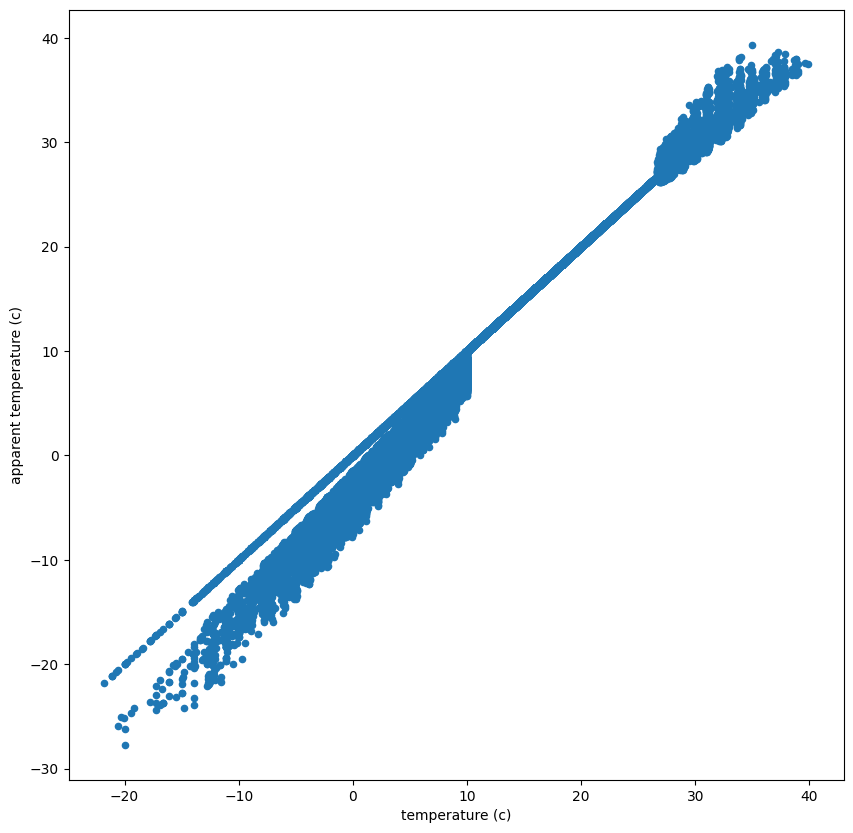

In [19]:
df.plot(kind='scatter', x='temperature (c)', y='apparent temperature (c)', figsize=(10,10))

<Axes: xlabel='temperature (c)', ylabel='humidity'>

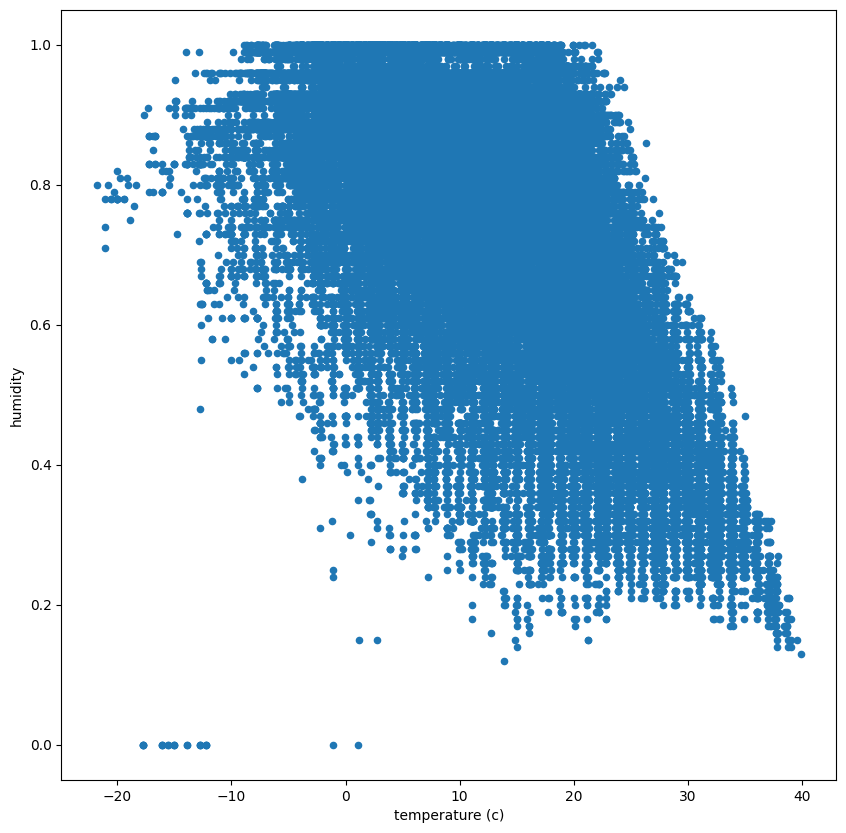

In [20]:
df.plot(kind='scatter', x='temperature (c)', y='humidity', figsize=(10,10))

# Завдання 5
Виведіть характеристики для категоріальних ознак

In [24]:
for column in df.columns:
    if df[column].dtype == 'object':
        print('\t', column)
        print(df[column].describe())
        print("\t", "Unique values:")
        print(df[column].value_counts())
        print("\n")

	 formatted date
count                             96453
unique                            96429
top       2010-08-02 00:00:00.000 +0200
freq                                  2
Name: formatted date, dtype: object
	 Unique values:
2010-08-02 00:00:00.000 +0200    2
2010-08-02 12:00:00.000 +0200    2
2010-08-02 03:00:00.000 +0200    2
2010-08-02 04:00:00.000 +0200    2
2010-08-02 05:00:00.000 +0200    2
                                ..
2009-03-09 22:00:00.000 +0100    1
2009-03-09 21:00:00.000 +0100    1
2009-03-09 20:00:00.000 +0100    1
2009-03-09 19:00:00.000 +0100    1
2016-09-09 23:00:00.000 +0200    1
Name: formatted date, Length: 96429, dtype: int64


	 summary
count             96453
unique               27
top       Partly Cloudy
freq              31733
Name: summary, dtype: object
	 Unique values:
Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
F

# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

In [27]:
cat_columns = []
for column in df.columns:
    if df[column].dtype not in (int, float):
        print(column)
        cat_columns.append(column)

formatted date
summary
precip type
daily summary


KeyboardInterrupt: 

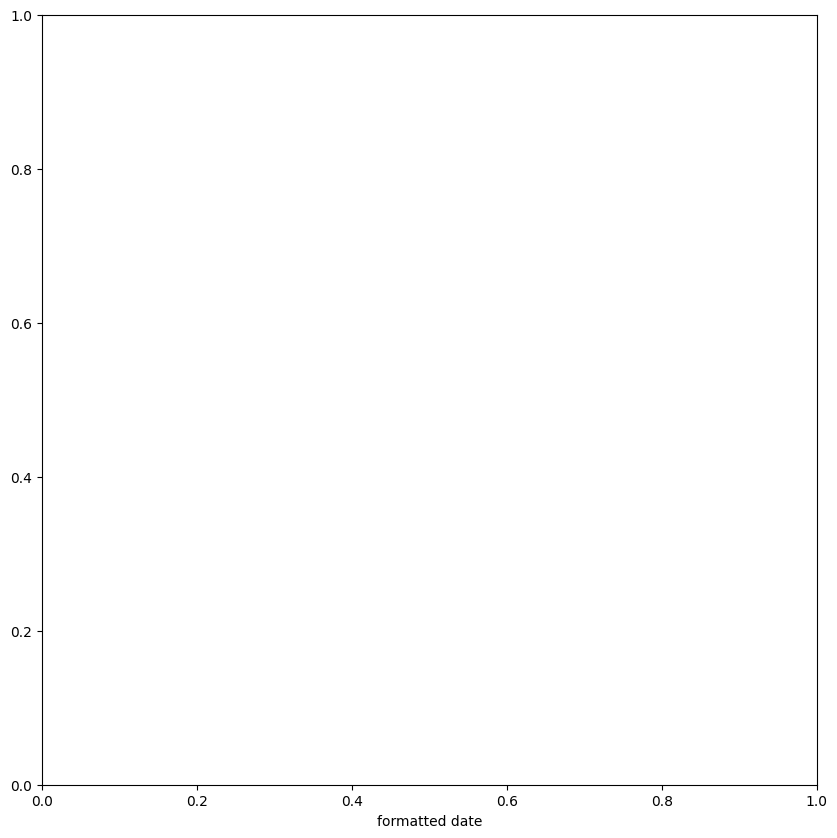

In [34]:
for column in cat_columns:
    df.boxplot(column='temperature (c)', by=column, figsize=(10, 10))
    plt.title(f'Boxplot of Temperature by {column}')
    plt.xlabel(column)
    plt.ylabel('Temperature (C)')
    plt.show()
